In [3]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import pandas as pd
import datetime
import my_tools as mt
from IPython.display import HTML


df_cases_daily = mt.read_csv('cases_daily', 'daily cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'New cases weekly')

df_deaths_daily = mt.read_csv('deaths_daily', 'daily deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Daily incidence')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Weekly incidence')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('../data/thresholds.csv').set_index('ind')

countries = df_cases_daily.columns
dates = df_cases_daily.index
dates_weekly = df_cases_weekly.index

latest_date = dates[-1]

In [19]:
def plot_trends_dynamically(countries=[]):
    fig, ax = plt.subplots(figsize=(13,9))
    leg = ax.legend()
    
    df_x_full = mt.threshold_data(df_prevalence, 'cases', 'weekly', reset=False)
    df_y_full = mt.threshold_data(df_incidence_weekly, 'cases', 'weekly', reset=False)
    
    df_global_trends = df_global.loc[df_global['cases_total'] > 100]
    index_mask = [date in df_cases_weekly.index for date in df_global_trends.index]
    df_global_trends = df_global_trends.loc[index_mask, ['prevalence', 'incidence_weekly']]
    
    df_x_full['Global'] = df_global_trends['prevalence']
    df_y_full['Global'] = df_global_trends['incidence_weekly']
    
    countries.append('Global')
    
    def animate(i):
        ax.clear()
        
        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.set_xlabel('Prevalence (total cases / population)')
        ax.set_ylabel('Incidence (weekly cases / population)')

        i += 1
        for country in countries:
            x = df_x_full[country].iloc[:i]
            y = df_y_full[country].iloc[:i]
            
            line, = ax.plot(x, y, '-o', markevery=[-1],label=country)
            plt.annotate(country, # this is the text
                 (x[-1],y[-1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='right',
                 color=line.get_color())
        
        if i > len(df_x_full) - 1:
            i = len(df_x_full) - 1
        
        ax.annotate(df_x_full.index[i].date(), xy=(0.85, 0.05), xycoords='axes fraction', fontsize=15)
        ax.legend(loc="upper left", frameon=False)
        ax.set_title('Trends (logarithmic scale)')
        
    anim = animation.FuncAnimation(fig, animate, frames=15)
    anim.save('test.gif', writer=animation.PillowWriter(fps=2))

No handles with labels found to put in legend.


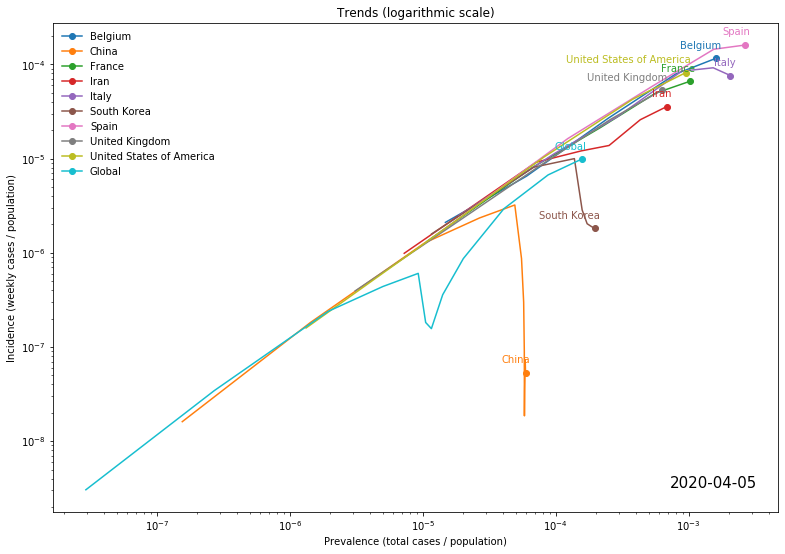

In [20]:
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'South Korea']
countries_of_interest.sort()

plot_trends_dynamically(countries_of_interest)